In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import random as r
import time

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
def custom_optimizer(model, X_train, Y_train, rho=0.95, epsilon=1e-7):
    # Initialize accumulated gradients and deltas
    accumulated_gradients = [tf.zeros_like(weight) for weight in model.trainable_weights]
    accumulated_deltas = [tf.zeros_like(weight) for weight in model.trainable_weights]

    for i in range(len(X_train)):
        with tf.GradientTape() as tape:
            prediction = model(X_train[i:i+1])
            loss = tf.keras.losses.categorical_crossentropy(Y_train[i:i+1], prediction)

        # Compute gradients
        model_gradients = tape.gradient(loss, model.trainable_weights)

        # Update accumulated gradients
        for j in range(len(accumulated_gradients)):
            accumulated_gradients[j] = rho * accumulated_gradients[j] + (1 - rho) * tf.square(model_gradients[j])

        # Compute deltas
        deltas = [-(tf.sqrt(accumulated_deltas[j] + epsilon) / tf.sqrt(accumulated_gradients[j] + epsilon)) * model_gradients[j] for j in range(len(accumulated_gradients))]

        # Update accumulated deltas
        for j in range(len(accumulated_deltas)):
            accumulated_deltas[j] = rho * accumulated_deltas[j] + (1 - rho) * tf.square(deltas[j])

        # Update weights
        for j in range(len(model.trainable_weights)):
            model.trainable_weights[j].assign_add(deltas[j])

In [ ]:
def create_model():
    model = Sequential([
        Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)),
        MaxPool2D(pool_size=(1,1)),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [ ]:
model = create_model()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
rho = 0.95
epsilon = 1e-7
epochs = 2
batch_size = 128

# Train the model
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        Y_batch = Y_train[i:i+batch_size]
        custom_optimizer(model, X_batch, Y_batch, rho, epsilon)

Epoch 1/2
Epoch 2/2


In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose = 1)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1142 - accuracy: 0.9764
Test Loss:  0.11418306827545166
Test Accuracy:  0.9764000177383423


No. of values in test dataset:  10000
1/1 [==============================] - 0s 26ms/step


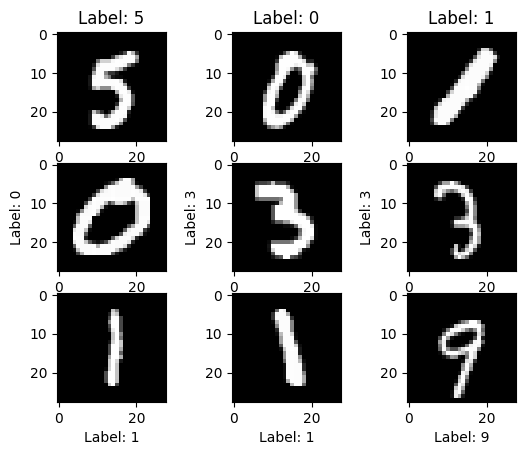

In [ ]:
import random as r
print('No. of values in test dataset: ',X_test.shape[0])
for i in range (9):
  image_index=r.randint(0,10000)
  plt.subplot(331 + i)
  plt.imshow(X_test[image_index].reshape(28, 28),cmap='gray')
  pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
  if i<3:
    plt.title('Label: ' + str(pred.argmax()))
  elif i>=3 and i<6:
    plt.ylabel('Label: ' + str(pred.argmax()))
  else:
    plt.xlabel('Label: ' + str(pred.argmax()))
plt.show()

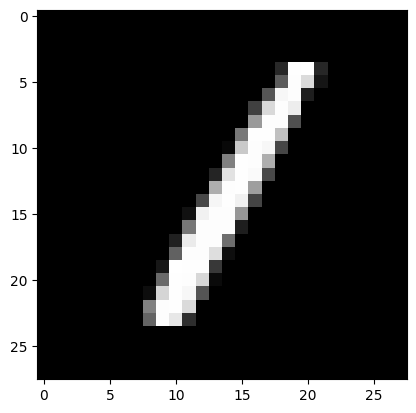

1/1 [==============================] - 0s 18ms/step
Keras inferences with 0.06396903991699218 second in average
[[9.7491141e-14 1.0000000e+00 4.2516983e-16 1.8883689e-19 3.5681225e-11
  4.1479154e-18 2.7173384e-15 6.5664747e-15 1.2742476e-14 4.9115110e-18]]
Predicted value: 1
Correct prediction !


In [ ]:
import time

image_index = 6789

expected_label=Y_test[image_index].argmax()
digit_image = X_test[image_index].reshape(1, 28, 28, 1)
# repeat few times to take the average execution time
loop_count = 10


plt.imshow(X_test[image_index], cmap='gray')
plt.show()
start_time = time.time()
for i in range(loop_count):
    prediction = model.predict(digit_image)
print("Keras inferences with %s second in average" %((time.time() - start_time) / loop_count))

print(prediction)
predicted_label = prediction.argmax()
print('Predicted value:', predicted_label)
if (expected_label == predicted_label):
  print('Correct prediction !')
else:
  print('Wrong prediction !')

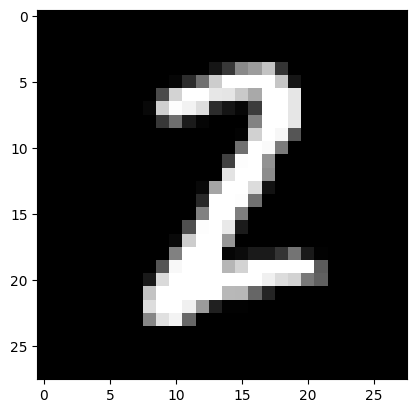

1/1 [==============================] - 0s 17ms/step

Keras inferences with 0.0632028579711914 seconds in average
Prediction:
[[7.0885680e-15 1.2693606e-06 9.9999869e-01 2.4267031e-09 5.5212521e-24
  2.1906700e-18 1.1383132e-19 3.0068975e-15 2.7807283e-12 1.1829802e-21]]
Predicted value: 2
Correct prediction!


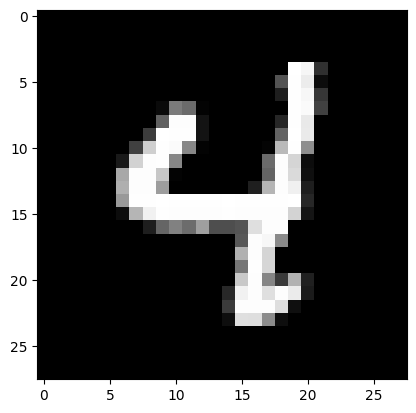

1/1 [==============================] - 0s 17ms/step

Keras inferences with 0.08836615085601807 seconds in average
Prediction:
[[1.8160012e-24 7.7813444e-19 6.1029238e-25 1.1647316e-26 1.0000000e+00
  1.1376972e-21 3.5958113e-23 8.0357045e-19 3.2632960e-18 1.4786542e-15]]
Predicted value: 4
Correct prediction!


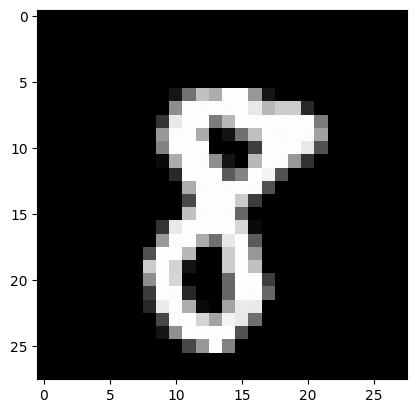

1/1 [==============================] - 0s 17ms/step

Keras inferences with 0.06327250003814697 seconds in average
Prediction:
[[2.8506439e-18 5.9973597e-18 2.9862544e-17 5.7932402e-21 6.2178084e-26
  1.3761558e-15 8.7334437e-23 3.6663601e-20 1.0000000e+00 1.0717946e-18]]
Predicted value: 8
Correct prediction!


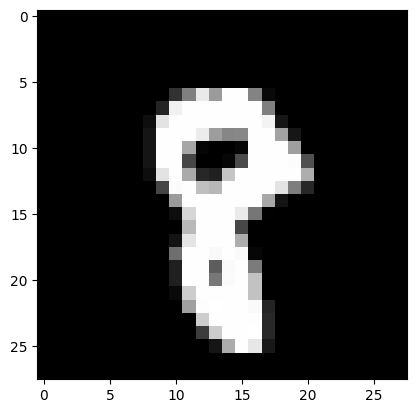

1/1 [==============================] - 0s 17ms/step

Keras inferences with 0.064300537109375 seconds in average
Prediction:
[[4.2963660e-11 4.2562279e-15 7.8445604e-11 1.4300447e-12 3.8068340e-11
  1.5274765e-10 2.8339522e-14 5.5345539e-13 1.0000000e+00 3.9618649e-11]]
Predicted value: 8
Correct prediction!


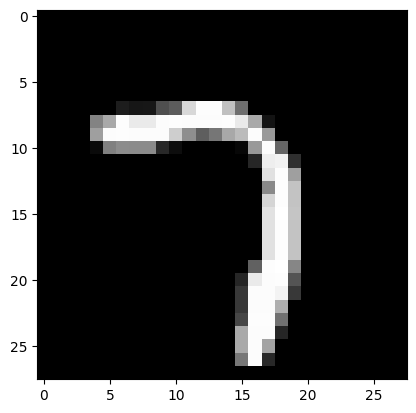

1/1 [==============================] - 0s 16ms/step

Keras inferences with 0.05938003063201904 seconds in average
Prediction:
[[1.4917580e-16 1.9520486e-17 3.3865441e-16 2.2303617e-12 1.0521197e-17
  6.6813343e-17 4.7315428e-25 1.0000000e+00 1.0412028e-19 1.8102674e-09]]
Predicted value: 7
Correct prediction!


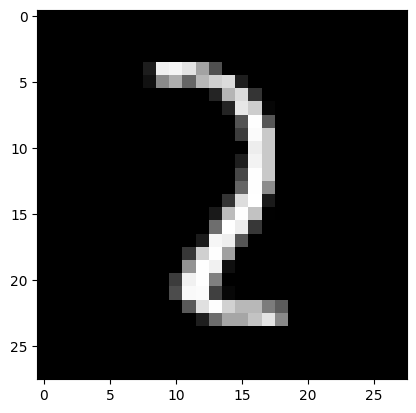

1/1 [==============================] - 0s 17ms/step

Keras inferences with 0.05846025943756104 seconds in average
Prediction:
[[2.8654831e-10 1.4924014e-08 1.0000000e+00 1.4693184e-10 6.2600194e-14
  1.9809141e-17 8.1509388e-15 6.5687927e-11 5.7632099e-09 2.5631551e-14]]
Predicted value: 2
Correct prediction!


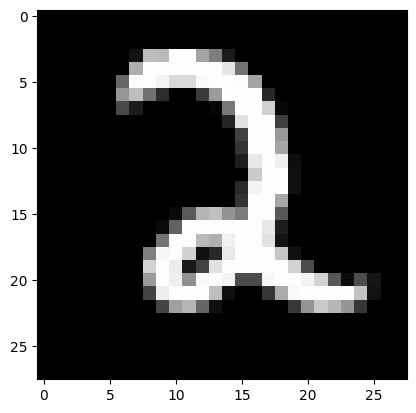

1/1 [==============================] - 0s 17ms/step

Keras inferences with 0.059578871726989745 seconds in average
Prediction:
[[2.2311160e-22 3.4621673e-13 1.0000000e+00 2.5415268e-17 1.9908795e-21
  1.7231020e-27 1.0171002e-24 1.3522909e-22 6.2565150e-20 1.7209998e-27]]
Predicted value: 2
Correct prediction!


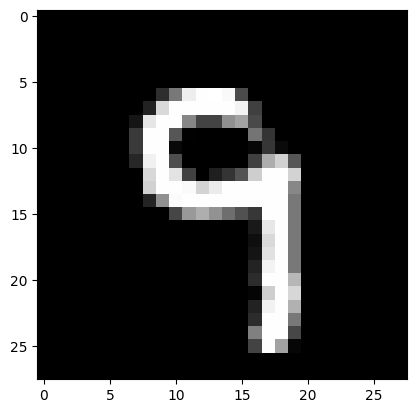

1/1 [==============================] - 0s 18ms/step

Keras inferences with 0.06476070880889892 seconds in average
Prediction:
[[7.6749397e-20 1.1434891e-18 4.6350833e-19 4.3932213e-09 2.5011370e-11
  8.4234825e-06 4.1647363e-17 1.3904790e-11 4.1209099e-11 9.9999154e-01]]
Predicted value: 9
Correct prediction!


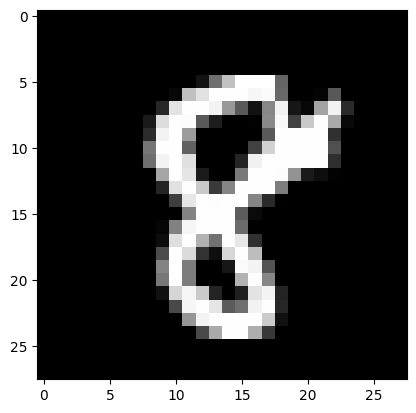

1/1 [==============================] - 0s 17ms/step

Keras inferences with 0.06503489017486572 seconds in average
Prediction:
[[6.5646927e-16 8.7229692e-20 4.6326731e-16 4.3021641e-22 9.3890818e-23
  2.0275874e-18 3.0968214e-20 1.1798052e-20 1.0000000e+00 2.7111527e-18]]
Predicted value: 8
Correct prediction!


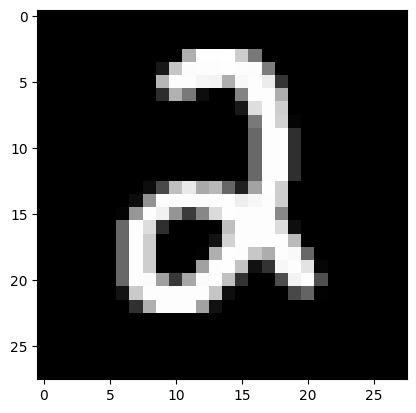

1/1 [==============================] - 0s 16ms/step

Keras inferences with 0.061545300483703616 seconds in average
Prediction:
[[3.6444713e-18 1.5790503e-11 1.0000000e+00 2.5654075e-12 3.2890692e-16
  1.9139740e-22 3.2411183e-23 1.5230948e-18 1.0896483e-12 1.5612241e-20]]
Predicted value: 2
Correct prediction!


In [ ]:
import random
random_indices = random.sample(range(len(X_test)), 10)

loop_count = 10

for image_index in random_indices:
    expected_label = Y_test[image_index].argmax()
    digit_image = X_test[image_index].reshape(1, 28, 28, 1)

    plt.imshow(X_test[image_index], cmap='gray')
    plt.show()

    start_time = time.time()
    for i in range(loop_count):
        prediction = model.predict(digit_image)
    average_inference_time = (time.time() - start_time) / loop_count

    print(f"\nKeras inferences with {average_inference_time} seconds in average")

    print("Prediction:")
    print(prediction)

    predicted_label = prediction.argmax()
    print('Predicted value:', predicted_label)

    if expected_label == predicted_label:
        print('Correct prediction!')
    else:
        print('Wrong prediction!')